In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux import *

In [2]:
filename = './dl2_gamma-diffuse_testing.h5'

In [3]:
sim = simulation_object(filename)

In [4]:
src = source_object(60*u.min)

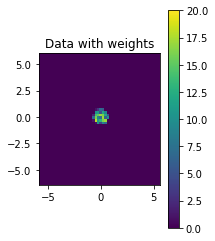

In [5]:
plt.subplot(121, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Data with weights')
plt.colorbar();

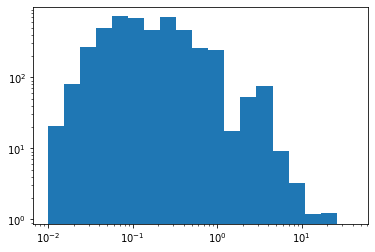

In [6]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 25.851032, 40]

plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src)
);

In [7]:
src_cutoff = source_object(60*u.min, spectrum_parameters = cutoff_spectrum_parameters) 

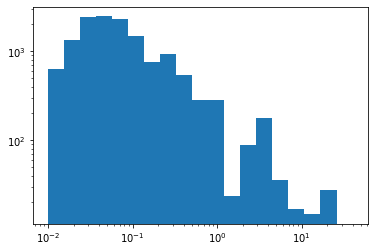

In [8]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 25.851032, 40]

plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src_cutoff)
);